<a href="https://colab.research.google.com/github/pachterlab/gget/blob/traffic/gget_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone traffic branch of gget repo
!git clone -q --branch traffic https://github.com/pachterlab/gget.git

# Load data

In [18]:
import glob
import pandas as pd
import numpy as np

In [3]:
# Get filenames of old and new traffic data
traffic_files = glob.glob("./gget/traffic/*.csv")

In [4]:
# Build data frame containing all traffic data
for i, file in enumerate(traffic_files):
  if i == 0:
    # Initiate dataframe
    traffic_df = pd.read_csv(file)
    traffic_df = traffic_df.set_index("_date")

  else:
    temp_df = pd.read_csv(file)
    temp_df = temp_df.set_index("_date")
    # Add new data to data frame
    traffic_df = temp_df.combine_first(traffic_df)

# Drop eventual duplicates
traffic_df = traffic_df.drop_duplicates().fillna(0)

traffic_df.head()

,total_clones,total_views,unique_clones,unique_views
_date,,,,
2022-10-29,0.0,53,0.0,15
2022-10-30,1.0,22,1.0,14
2022-10-31,2.0,55,1.0,30
2022-11-01,2.0,57,2.0,26
2022-11-02,0.0,36,0.0,20


# Plotting

In [5]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [6]:
!mkdir plots

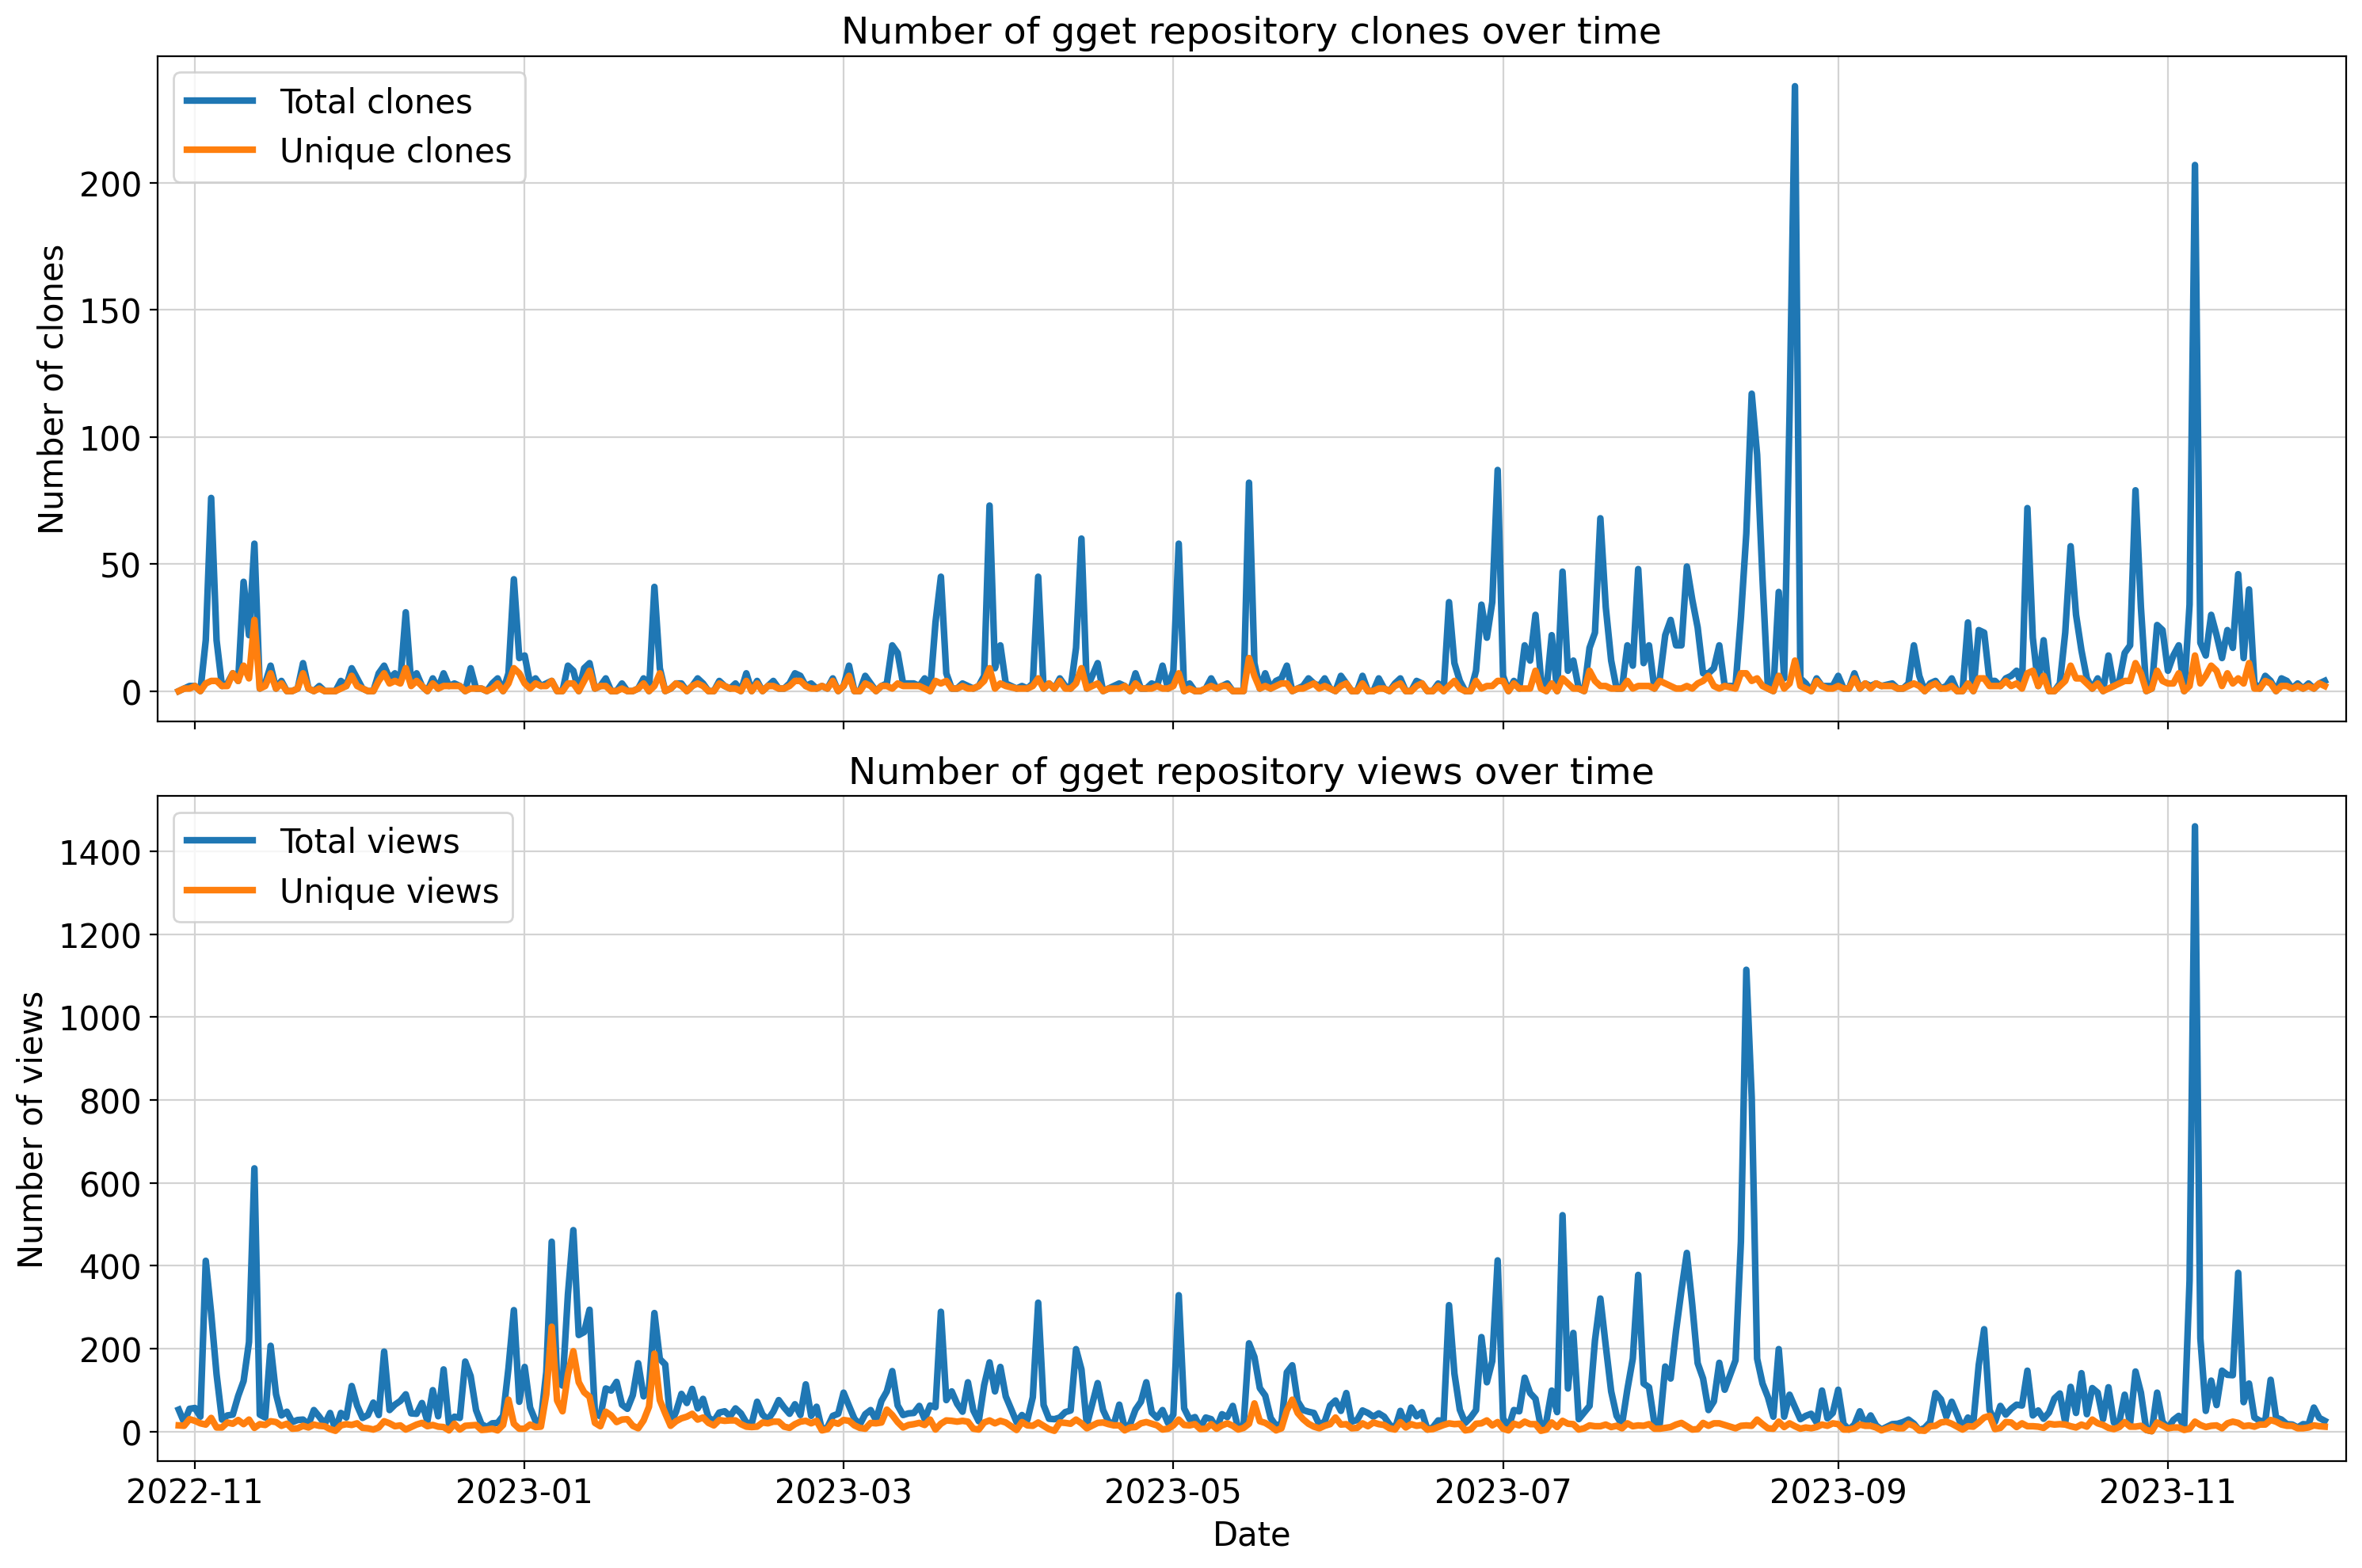

In [29]:
fig, axs = plt.subplots(figsize=(15,10), nrows=2, sharex = True)

fontsize=15
lw = 3

# Plot number of clones
ax = axs[0]
x = pd.to_datetime(traffic_df.index.values)
y = traffic_df["total_clones"].values
ax.plot(x, y, label="Total clones", lw=lw)

y = traffic_df["unique_clones"].values
ax.plot(x, y, label="Unique clones", lw=lw)

ax.legend(fontsize=fontsize)

ax.set_title("Number of gget repository clones over time", fontsize=fontsize+2)
ax.set_ylabel("Number of clones", fontsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

# Add grid and set below graph
ax.grid(True, which="both", color="lightgray")
ax.set_axisbelow(True)

ax.margins(x=0.01)

# Plot number of views
ax = axs[1]
y = traffic_df["total_views"].values
ax.plot(x, y, label="Total views", lw=lw)

y = traffic_df["unique_views"].values
ax.plot(x, y, label="Unique views", lw=lw)

ax.legend(fontsize=fontsize)

ax.set_title("Number of gget repository views over time", fontsize=fontsize+2)
ax.set_ylabel("Number of views", fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)
ax.set_xlabel("Date", fontsize=fontsize)

# Add grid and set below graph
ax.grid(True, which="both", color="lightgray")
ax.set_axisbelow(True)

ax.margins(x=0.01)

plt.tight_layout()

plt.savefig("./plots/gget_clones_views.png", bbox_inches='tight', dpi=300)

fig.show()

In [8]:
# Remove gget folder
!yes | rm -r gget